# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [1]:
((60**-1 + 80**-1)/2)**-1


68.57142857142857

### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Generujemy listę wielkości 700 tys.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy je jako chore.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich diagnoze na nieprawidlowa (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).



In [2]:
import numpy as np



In [3]:
def sim(count, ch, sk):
    p = np.zeros([700_000,2])
    # 700 chorych i oznaczonych jako chorzy
    p[0:ch-1,0] = 1
    p[0:ch-1,1] = 1
    # 1% chorych jako zdrowi 
    p[0:int(ch*0.01)-1,1] = 0

    # 1% zdrowych jako chorzy
    prc =  int(ch + (count-ch) *(1-sk))
    p[ch:prc,1] = 1

    # liczba osób chorych z wynikiem pozytywnym
    cp  =[]
    [cp.append(row) for row in p if row[0]==1 and row[1]==1]


    # liczba wszystkich osob z wynikiem pozytywnym
    ap = []
    [ap.append(row) for row in p if row[1]==1]

    return len(cp)/len(ap)

sim(700_000, 700, 0.99)

0.09016393442622951

#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [4]:
def bayes(z,s):
    return (z*s)/(z*s+(1-z)*(1-s))

bayes(0.001, 0.99)
    

0.09016393442622944

In [5]:
import time

sim_time = time.perf_counter()
for i in range(10):
    sim(700_000, 700, 0.99)
sim_time = (time.perf_counter() - sim_time)/10

ba_time = time.perf_counter()
for i in range(10):
    bayes(0.001, 0.99)
ba_time = (time.perf_counter() - ba_time)/10

print(f'Czas sumulacji:{sim_time:0.7f}s, Czas ze wzoru bayesa:{ba_time:0.7f}s')

Czas sumulacji:0.4363556s, Czas ze wzoru bayesa:0.0000056s


#### C)

Wyświetl wykres, gdzie na osi X znajduje się _czułość testu_ a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_.

Text(0, 0.5, 'Prawdopodobieństwo')

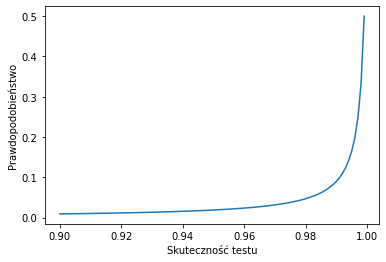

In [6]:
# Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora 
x = np.arange(0.9,1,0.001)
y = []
[y.append(bayes(0.001, a)) for a in x]

import matplotlib.pyplot as plt
plt.plot(x,y)
#plt.yscale('log')
plt.xlabel('Skuteczność testu')
plt.ylabel('Prawdopodobieństwo')

### Zadanie 3

Sprawdź (symulacją) jak często trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze z 13 kart. Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w jakimś kolorze dostaniemy $\ge 8$ kart. Przeprowadź 1000 takich prob i oblicz średnią. Dodatkowo wypisz jedną (np. ostatnią) taką wylosowaną rękę.

In [7]:
def losowanie():
    reka = np.random.choice(talia, size=13, replace=False)
    kier = pik = trefl = karo = 0
    for karta in reka:
        if karta.startswith('kier'):
            kier += 1
        elif karta.startswith('karo'):
            karo += 1
        elif karta.startswith('pik'):
            pik += 1
        else:
            trefl +=1
    return karo, kier, pik, trefl

In [23]:
kolor = np.arange(1,14,1)
kolory = ['karo','pik','trefl','kier']
talia =[]
for k in kolory:
    for v in kolor:
        talia.append(k +' '+ str(v))

wyniki =[]

for i in range(1000):
    a=0
    karo= kier= pik= trefl = 0
    while not(kier>=8 or trefl>=8 or pik>=8 or karo>=8):
        a+=1
        reka = np.random.choice(talia, size=13, replace=False)
        kier = pik = trefl = karo = 0
        for karta in reka:
            if karta.startswith('kier'):
                kier += 1
            elif karta.startswith('karo'):
                karo += 1
            elif karta.startswith('pik'):
                pik += 1
            else:
                trefl +=1
    wyniki.append(a)

In [21]:
print(f'Prawdopodobieństwo: {(sum(wyniki)/len(wyniki))/sum(wyniki):0.2%}')

Prawdopodobieństwo: 0.10%


In [24]:
print('Ostatnia ręka:')
[print(k) for k in reka] 

Ostatnia ręka:
kier 3
pik 10
kier 4
karo 12
kier 8
kier 1
trefl 11
trefl 10
kier 9
kier 12
trefl 2
kier 10
kier 2


[None, None, None, None, None, None, None, None, None, None, None, None, None]